# Introduction:

I am a junior data analyst. My clients are the e-commerce store "Product Range". My task is to analyse the product range of the store, and to formulate and carry out statistical hypothesis.

## Data Outline:

ecommerce_dataset_us.csv:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

# Part 1: Reading the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
from scipy import stats as st
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go 
import plotly.io as pio



In [2]:
sns.set(style="darkgrid")
palette = sns.color_palette('pastel')
sns.set_palette(palette)

plt.rcParams.update({
    'figure.figsize': (13, 8),
    'font.size': 14,
    'axes.titlesize': 16,
    'lines.linewidth': 4,
    'axes.spines.top': False,
    'axes.spines.right': False,
})


In [3]:
try:
    data = pd.read_csv(r'C:\Users\nadav\OneDrive\מסמכים\Practicum100\databases\ecommerce_dataset_us.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t')

Let's check the data on this database:

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.describe(include = 'object')

,InvoiceNo,StockCode,Description,InvoiceDate
count,541909,541909,540455,541909
unique,25900,4070,4223,23260
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/29/2019 14:41
freq,1114,2313,2369,1114


In [8]:
data.duplicated().sum()

5268

We can see we have several problems in our data. First, We have some missing values in the customer_id and description columns. We can also see we have unrealistic values in the quantity and price columns. And finally, we have duplicates. Let's move on to preprocessing.

# Part 2: Data Preprocceing:

First, Let's turn the date column to 'datetime' type:

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = '%m/%d/%Y %H:%M')

Now let's delete the duplicates:

In [10]:
data = data.drop_duplicates().reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.7+ MB


In [11]:
data.describe(include = 'object')

,InvoiceNo,StockCode,Description
count,536641,536641,535187
unique,25900,4070,4223
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2301,2357


Great! Now let's first handle the missing values. Let's check if they have anything in common. We'll start with the 'Description' column's missing values:

In [12]:
data.loc[data['Description'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
605,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1934,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1935,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1936,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1951,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
1952,536550,85044,NaN,1,2018-11-29 14:34:00,0.0,NaN
1984,536552,20950,NaN,1,2018-11-29 14:34:00,0.0,NaN
1985,536553,37461,NaN,3,2018-11-29 14:35:00,0.0,NaN
1986,536554,84670,NaN,23,2018-11-29 14:35:00,0.0,NaN
2362,536589,21777,NaN,-10,2018-11-29 16:50:00,0.0,NaN


We see that there is nothing in common with these missing values. They are a very small part of our data, so let's delete them:

In [13]:
data = data.dropna(subset = ['Description'], axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.7+ MB


Great! Let's check the other missing values:

In [14]:
data.loc[data['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1409,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1410,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
1411,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,NaN
1412,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2018-11-29 14:32:00,2.51,NaN
1413,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2018-11-29 14:32:00,0.43,NaN
1414,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2018-11-29 14:32:00,0.43,NaN
1415,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2018-11-29 14:32:00,0.43,NaN
1416,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2018-11-29 14:32:00,2.51,NaN


We see there is nothing in common. The null values in this column take a large amount of data(almost 25%), so we'll keep them for now, and filter the dataset if necessary.

We see we have low case descriptions that aren't the name of an item. Let's check those:

In [15]:
data.loc[data['Description'].str.islower()]['Description'].value_counts()

check                                  159
damages                                 45
damaged                                 43
found                                   25
sold as set on dotcom                   20
                                      ... 
wrong code                               1
wrong code?                              1
did  a credit  and did not tick ret      1
sold as 22467                            1
lost                                     1
Name: Description, Length: 127, dtype: int64

Looks like our unfiltered data also has all of the quantity updates for our stock. Let's filter that:

In [16]:
quantity_update = data.loc[data['Description'].str.islower()]

Let's check the unlogical values in quantity and price:

In [17]:
data.loc[data['Quantity'] <= 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2018-11-29 10:24:00,3.45,17548.0
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2018-11-29 10:24:00,1.65,17548.0
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2018-11-29 10:24:00,1.65,17548.0
916,C536506,22960,JAM MAKING SET WITH JARS,-6,2018-11-29 12:38:00,4.25,17897.0


In [18]:
data.loc[data['UnitPrice'] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
297646,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
297647,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


We can see that the irregular numbers in the quantity are items that customers are refunded for: probably returned, or discounts they recived. In the price column, We can see that there is bad debt that has been recorded as a loss to our store. Let's filter the data:

In [19]:
refunds = data.loc[data['Quantity'] <= 0]
refunds

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
...,...,...,...,...,...,...,...
535188,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0
536280,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0
536447,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0
536448,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0


Let's filter the price too:

In [20]:
debt = data.loc[data['UnitPrice'] < 0]
debt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
297646,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
297647,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


Great! Let's check our data table once more:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.7+ MB


In [22]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,535187.000000,535187.000000,401604.000000
mean,9.671593,4.645242,15281.160818
std,219.059056,97.364810,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
data.describe(include = 'object')

,InvoiceNo,StockCode,Description
count,535187,535187,535187
unique,24446,3958,4223
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2301,2357


We see there still is a problem in the 'price' column: We have times that price = 0 . Let's check that:

In [24]:
data.loc[data['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
6294,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,NaN
6295,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,NaN
7211,537032,21275,?,-30,2018-12-01 16:50:00,0.0,NaN
9132,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2018-12-03 14:02:00,0.0,12647.0
12963,537425,84968F,check,-20,2018-12-04 15:35:00,0.0,NaN


Great! Let's take these rows out of our refunds:

In [25]:
refunds = refunds.drop(refunds.loc[refunds['Description'].str.islower()].index, axis = 0)
len(refunds)

9360

Let's create a filtered table for sales:

In [26]:
sales = data.loc[(data['UnitPrice'] > 0)]

Let's check our sales table:

In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534129 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534129 non-null  object        
 1   StockCode    534129 non-null  object        
 2   Description  534129 non-null  object        
 3   Quantity     534129 non-null  int64         
 4   InvoiceDate  534129 non-null  datetime64[ns]
 5   UnitPrice    534129 non-null  float64       
 6   CustomerID   401564 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.6+ MB


In [28]:
sales.describe()

,Quantity,UnitPrice,CustomerID
count,534129.000000,534129.000000,401564.000000
mean,9.916818,4.695864,15281.266797
std,216.452113,95.079189,1713.978947
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.100000,15145.000000
75%,10.000000,4.130000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [29]:
sales.describe(include = 'object')

,InvoiceNo,StockCode,Description
count,534129,534129,534129
unique,23796,3938,4042
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2295,2353


Looks good! Now all we have to do is change our column names for our 5 dataframes:

In [30]:
frames = [data,debt,refunds,quantity_update,sales]
columns = ['order_id','item_code','item_name','quantity','datetime','price','customer_id']
for i in frames:
    i.columns = columns

Let's check the data table:

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     535187 non-null  object        
 1   item_code    535187 non-null  object        
 2   item_name    535187 non-null  object        
 3   quantity     535187 non-null  int64         
 4   datetime     535187 non-null  datetime64[ns]
 5   price        535187 non-null  float64       
 6   customer_id  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.7+ MB


Looks good.

### Conclusion:

- We dealt with missing values
- We deleted duplicates
- We changed datatypes
- We changed column names
- We created new dataframes for each subject

# Part 3: EDA

## Distribution of price:

Let's check the distribution of item prices. First, Let's create a table with all items and their price from the sales table:

In [32]:
price_per_item = sales.loc[sales['customer_id'].isna() == False].groupby(['item_code','item_name']).agg({'price':'max'})
price_per_item.head(10)

,,price
item_code,item_name,
10002,INFLATABLE POLITICAL GLOBE,0.85
10080,GROOVY CACTUS INFLATABLE,0.85
10120,DOGGY RUBBER,0.21
10123C,HEARTS WRAPPING TAPE,0.65
10124A,SPOTS ON RED BOOKCOVER TAPE,0.42
10124G,ARMY CAMO BOOKCOVER TAPE,0.42
10125,MINI FUNKY DESIGN TAPES,0.85
10133,COLOURING PENCILS BROWN TUBE,0.85
10135,COLOURING PENCILS BROWN TUBE,2.46


Now let's plot a histogram to see the price range:

<AxesSubplot:>

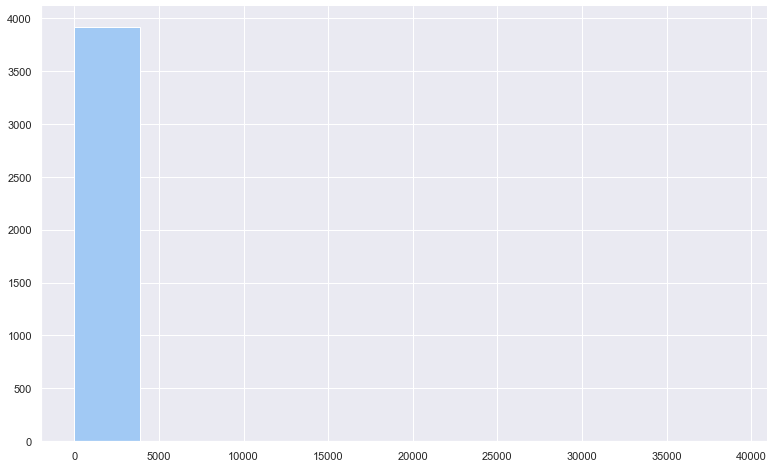

In [33]:
price_per_item['price'].hist()

We can see we have some pretty big outliners! Let's check our percentiles:

In [34]:
np.percentile(price_per_item['price'], q = (90,95,99))

array([ 8.725 , 12.5625, 24.994 ])

We can see that 99% of our items have prices under 25. Let's define that as our threshold for outliners:

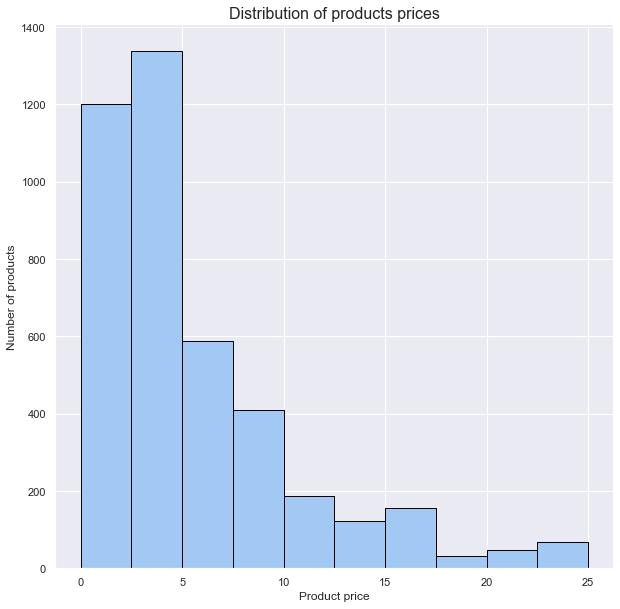

In [35]:
filtered_sales = sales.loc[sales['price'] <= 25]
price_per_item = filtered_sales.groupby(['item_code','item_name']).agg({'price':'max'})
price_per_item['price'].hist(edgecolor = 'black', figsize = (10,10))
plt.title('Distribution of products prices')
plt.xlabel('Product price')
plt.ylabel('Number of products');

We can see that the vast majority of prices are under 5$. Then we have a decrease in the number of products with higher prices. This means our store focuses on cheap products, not expensive ones.

### Quantity Distribution

Let's do the same with the median quantity for each product:

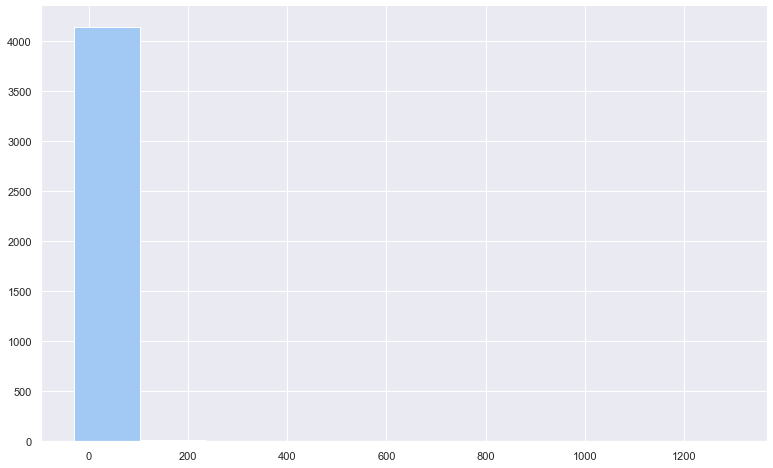

In [36]:
avg_quantity = filtered_sales.groupby(['item_code','item_name']).agg({'quantity':'mean'})
avg_quantity['quantity'].hist();

Again, we see huge outlines. Let's check the percentiles:

In [37]:
np.percentile(avg_quantity['quantity'], q = (95,99))

array([25.        , 48.99186992])

We can see that 99% of products have a mean of 60 per quantity. Let's check these products:

In [38]:
avg_quantity.loc[avg_quantity['quantity'] > 60]

,,quantity
item_code,item_name,
16014,SMALL CHINESE STYLE SCISSOR,246.814815
16033,MINI HIGHLIGHTER PENS,210.000000
16045,POPART WOODEN PENCILS ASST,128.985507
16049,TEATIME GEL PENS ASST,100.800000
16216,LETTER SHAPE PENCIL SHARPENER,74.066667
16259,PIECE OF CAMO STATIONERY SET,102.250000
17001,HEAVENS SCENT FRAGRANCE OILS ASSTD,72.000000
17003,BROCADE RING PURSE,95.518672
17084R,ASSORTED INCENSE PACK,149.333333


They seem like perfectly regular items, But they are outliners. Let's check the data without them:

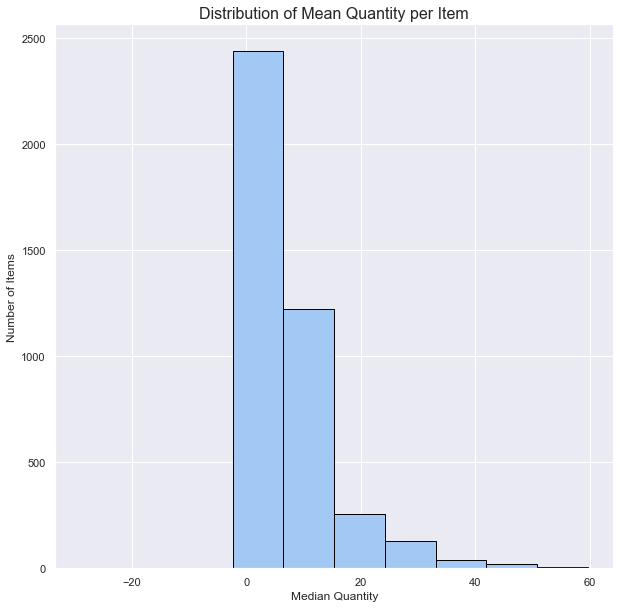

In [39]:
avg_quantity.loc[(avg_quantity['quantity'] < 60) ].hist(bins = 10,edgecolor = 'black', figsize = (10,10))
plt.title('Distribution of Mean Quantity per Item')
plt.xlabel('Median Quantity')
plt.ylabel('Number of Items');

In [40]:
avg_quantity[avg_quantity['quantity'] < 0]

,,quantity
item_code,item_name,
20703,BLUE PADDED SOFT MOBILE,-1.500000
20957,PORCELAIN HANGING BELL SMALL,-1.000000
21144,PINK POODLE HANGING DECORATION,-2.333333
21412,VINTAGE GOLD TINSEL REEL,-6.000000
21645,ASSORTED TUTTI FRUTTI ROUND BOX,-24.000000
22034,ROBIN CHRISTMAS CARD,-0.400000
22769,CHALKBOARD KITCHEN ORGANISER,-0.500000
35400,WOODEN BOX ADVENT CALENDAR,-0.461538
35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,-1.000000


We can see that most items have a median quantity that is less than 10. Only a few have their median quantity higher then that. This shows that users prefer buying smaller amounts of items. We can also see we have items with an average quantity lowe than 0. This shows that some items are preffered to be returned by customers.

### Creating revenue column

Let's create a column for revenue and months:

In [41]:
sales['revenue'] = sales['price'] * sales['quantity']
sales['month'] = sales['datetime'].dt.strftime('%Y-%m')

Great!

### Categorizing

Let's categorize our items in terms of price and median quantity. First, Let's create a dataframe for our items.

In [42]:
items = sales.groupby(['item_code','item_name']).agg({'price':'max','quantity':'median'}).reset_index()
items.head(5)

,item_code,item_name,price,quantity
0,10002,INFLATABLE POLITICAL GLOBE,1.66,5.0
1,10080,GROOVY CACTUS INFLATABLE,0.85,12.0
2,10120,DOGGY RUBBER,0.21,5.0
3,10123C,HEARTS WRAPPING TAPE,0.65,1.0
4,10124A,SPOTS ON RED BOOKCOVER TAPE,0.42,4.0


Now, for each category we'll divide our data into 5 groups. We will divide it according to percentiles. First, let's do with price:

In [43]:
price_percentile = np.percentile(items['price'], q = (20,40,60,80))
items['price_category'] = pd.Series('Nan')
for i in items.index:
    if items['price'][i] < price_percentile[0]:
        items['price_category'][i] = 'Very Cheap'
    elif items['price'][i] < price_percentile[1]:
        items['price_category'][i] = 'Cheap'
    elif items['price'][i] < price_percentile[2]:
        items['price_category'][i] = 'Mid range'
    elif items['price'][i] < price_percentile[3]:
        items['price_category'][i] = 'Expensive'
    else:
        items['price_category'][i] = 'Very Expensive'

In [44]:
items.head(10)

,item_code,item_name,price,quantity,price_category
0,10002,INFLATABLE POLITICAL GLOBE,1.66,5.0,Cheap
1,10080,GROOVY CACTUS INFLATABLE,0.85,12.0,Very Cheap
2,10120,DOGGY RUBBER,0.21,5.0,Very Cheap
3,10123C,HEARTS WRAPPING TAPE,0.65,1.0,Very Cheap
4,10124A,SPOTS ON RED BOOKCOVER TAPE,0.42,4.0,Very Cheap
5,10124G,ARMY CAMO BOOKCOVER TAPE,0.42,4.0,Very Cheap
6,10125,MINI FUNKY DESIGN TAPES,1.66,4.0,Cheap
7,10133,COLOURING PENCILS BROWN TUBE,1.66,10.0,Cheap
8,10135,COLOURING PENCILS BROWN TUBE,2.51,8.0,Cheap
9,11001,ASSTD DESIGN RACING CAR PEN,3.36,6.5,Mid range


Great!

### Conclusion:

- We checked the distribution of prices and median quantity per item
- We created new columns: 'Month' and 'Revenue' for the sales dataframe.
- We categorized our items according to price.

# Part 4: Analysing the data:

### Top selling items

Let's check the top and lowest selling items. First we will check the items that were ordered most, and then we will check the items that were ordered most in terms of quantity:

In [78]:
orders_num_per_item = sales.groupby('item_name').agg({'order_id':'nunique','quantity':'sum','revenue':'sum'}).reset_index()
orders_num_per_item.columns = ['item_name','number_of_orders','total_quantity','total_revenue']
top_10_most_orders = orders_num_per_item.sort_values(by = 'number_of_orders', ascending = False)[:10].sort_values(by = 'number_of_orders')
fig = px.bar(
    top_10_most_orders, 
    x = 'number_of_orders',
    y = 'item_name',
    orientation = 'h',
    labels = {'number_of_orders':'Number of Orders', 'item_name':'Item'})
fig.update_layout(title = 'Top 10 most sold items')

fig.show()

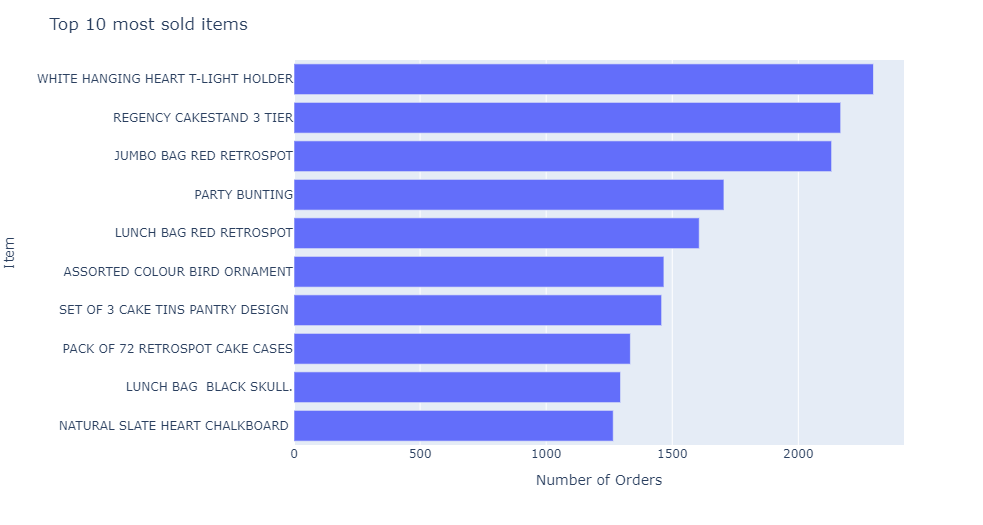

We can see that our most sold item is a white hanging heart t-light holder, with over 2000 orders for this item. We also see that all of our items are items for the house: either to decorate it, or to use it. We also see that we don't have any essensial house items here, but mainly decorative things. This might show that most of our customers buy our products so that they can have a fun and cheap thing in their house. It's not something they need, but it's something they would like to have with the right price.


Let's check our least selling items. We can assume that our least selling items have been sold once. Let's check how many of our items were sold once:

In [46]:
len(orders_num_per_item.loc[orders_num_per_item['number_of_orders'] == 1])

175

We see we have 175 items that only have been sold once! Let's check 10 of them:

In [47]:
top_10_least_orders = orders_num_per_item.sort_values(by = 'number_of_orders')[:10]
top_10_least_orders['item_name']

2455                PEG BAG APPLE DESIGN
1728     HOT WATER BOTTLE BABUSHKA LARGE
3014             SCALLOP SHELL SOAP DISH
2523      PINK CHRYSANTHEMUMS ART FLOWER
1844         KEEP OUT GIRLS DOOR HANGER 
2997     S/4 BLACK DISCO PARTITION PANEL
158      AMBER BERTIE MOBILE PHONE CHARM
879      COUNTRY COTTAGE  DOORSTOP GREEN
383     BLACK GLASS/SHELL/PEARL NECKLACE
1750                INCENSE BAZAAR PEACH
Name: item_name, dtype: object

Here we can see a much wider range of products than we saw in the top 10: From doorstops to hot water bottles. It's safe to say there isn't any pattern here.

Now let's check the top selling items in terms of quantity:

In [79]:
top_10_quantity = orders_num_per_item.sort_values(by = 'total_quantity', ascending = False)[:10].sort_values(by = 'total_quantity')
fig = px.bar(
    top_10_quantity, 
    x = 'total_quantity',
    y = 'item_name',
    orientation = 'h',
    labels = {'total_quantity':'Total Quantity', 'item_name':'Item'})
fig.update_layout(title = 'Top 10 most sold items in terms of Quantity')

fig.show()

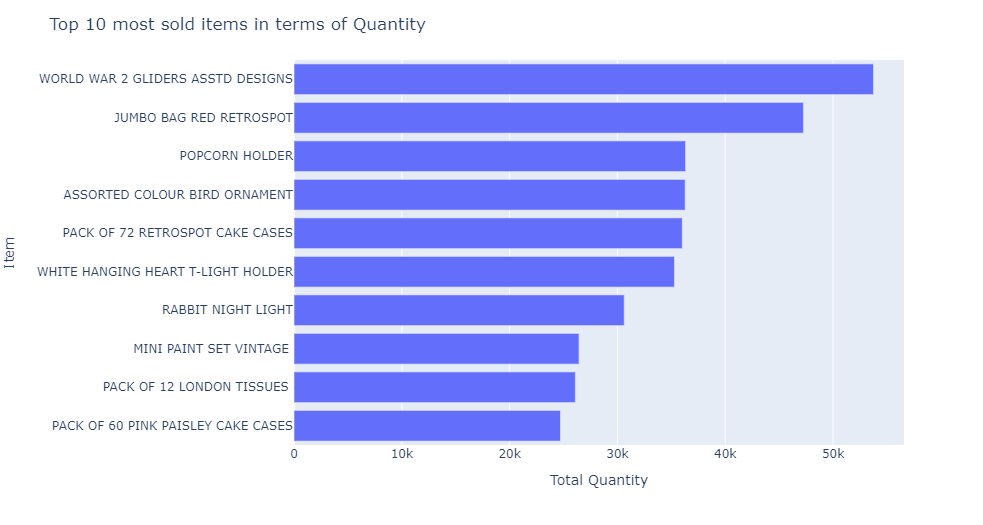

We see here a few interesting things. Our White T-Light Holder, that was ordered in the most orders, Is only 6th in terms of quantity. The item that is sold most is a WW2 glidew, with about 50,000 items sold. We can see that in addition to the decorative things we saw in the last graph, we see one time things, like crafts and popcorn holders. This shows that customers that buy one time things will buy more of them in one order, because they know the'll use it. 

Let's check the least sold items in terms of quantity. Again, Let's check how many items only sold 1 product:

In [49]:
len(orders_num_per_item.loc[orders_num_per_item['total_quantity'] == 1])

69

We can see there are 69 items that were sold once. These are 67 items out of the 172 items that were only ordered once. Let's see if there is anything in common with items that were ordered once with a quantity more than 1:

In [50]:
orders_num_per_item.loc[(orders_num_per_item['total_quantity'] > 1) & (orders_num_per_item['number_of_orders'] == 1)]['item_name'].head(10)

10               TOADSTOOL BEDSIDE LIGHT 
33        16 PC CUTLERY SET PANTRY DESIGN
80           4 GOLD FLOCK CHRISTMAS BALLS
115       72 CAKE CASES VINTAGE CHRISTMAS
134          ACRYLIC JEWEL SNOWFLAKE,PINK
158       AMBER BERTIE MOBILE PHONE CHARM
187    ANT SILVER TURQUOISE BOUDICCA RING
232     ASSORTED COLOUR SILK GLASSES CASE
275        BAKING MOULD CUPCAKE CHOCOLATE
282    BAKING MOULD TOFFEE CUP  CHOCOLATE
Name: item_name, dtype: object

We see these are all small things: Glasses cases and Christmas bells. Looks like these items weren't bought alone because they are cheap and they may use it afterwards.

Let's check the items with the most revenue:

In [80]:
top_10_revenue = orders_num_per_item.sort_values(by = 'total_revenue', ascending = False)[:10].sort_values(by = 'total_revenue')
fig = px.bar(
    top_10_revenue, 
    x = 'total_revenue',
    y = 'item_name',
    orientation = 'h',
    labels = {'total_revenue':'Total Revenue', 'item_name':'Item'})
fig.update_layout(title = 'Top 10 most sold items in terms of Revenue')

fig.show()

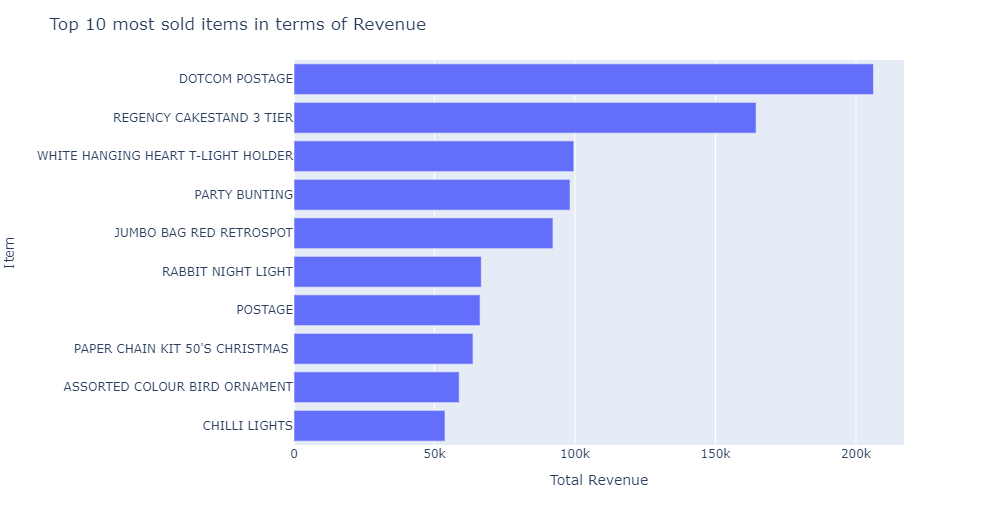

We can see a few items that we saw earlier, But we can see that the number one revenue source for our website is postage. More than 200,000$ were spent on postage. Other then that, the Cakestand is the item that gives the most revenue, with the rest of the items correlate more with the top quantity list. This shows that no matter how many times an item is sold, the revenue depends on how many pieces it sold.

Let's check the items with the least amount of revenue:

In [81]:
bottom_10_revenue = orders_num_per_item.sort_values(by = 'total_revenue').query('total_revenue > 0')[:10]
fig = px.bar(
    bottom_10_revenue, 
    x = 'total_revenue',
    y = 'item_name',
    orientation = 'h',
    labels = {'total_revenue':'Total Revenue', 'item_name':'Item'})
fig.update_layout(title = 'Bottom 10 most sold items in terms of Revenue')
fig.update_xaxes(range = (0,max(bottom_10_revenue['total_revenue'])))
fig.show()

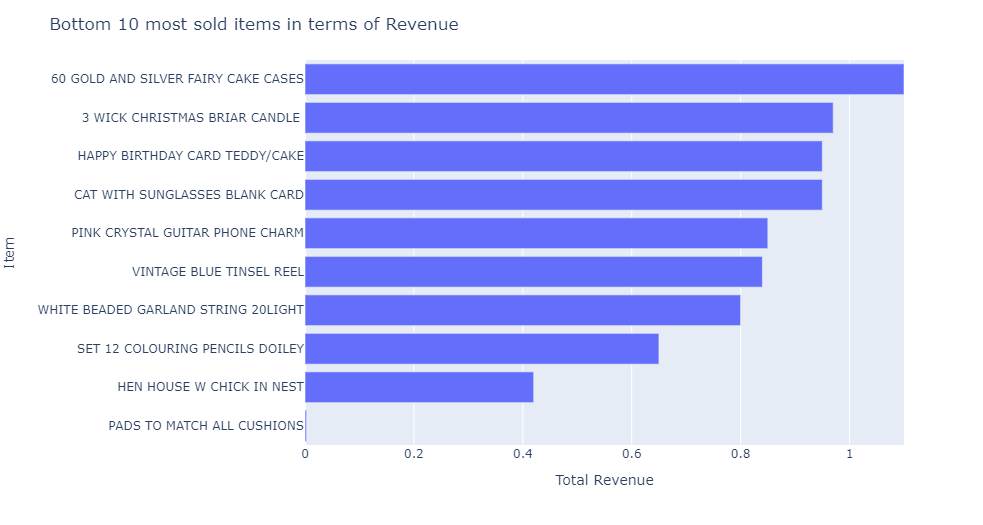

So we see these are the cheapest items that were ordered once. Nothing in common about these items.

Let's check if some items sell more on different months. First, Let's check which months sold the most. To do that, Let's check our date range of our data:

In [53]:
sales['datetime'].min()

Timestamp('2018-11-29 08:26:00')

In [54]:
sales['datetime'].max()

Timestamp('2019-12-07 12:50:00')

We can see our data ranges from the 29/11/2018 to the 07/12/19. This means we should take these months out of our equasion, since they are not full months:

In [82]:
items_per_months = sales.groupby(['month']).agg({'order_id':'nunique'}).reset_index()
items_per_months.columns = ['month','number_of_orders']
fig = px.line(items_per_months,
              x = 'month',
              y = 'number_of_orders',
              title = 'Orders per Time',
              labels ={'month':'Month','number_of_orders':'Number Of Orders'})
fig.update_xaxes(range = ['2018-12-01','2019-11-01'])
fig.show()

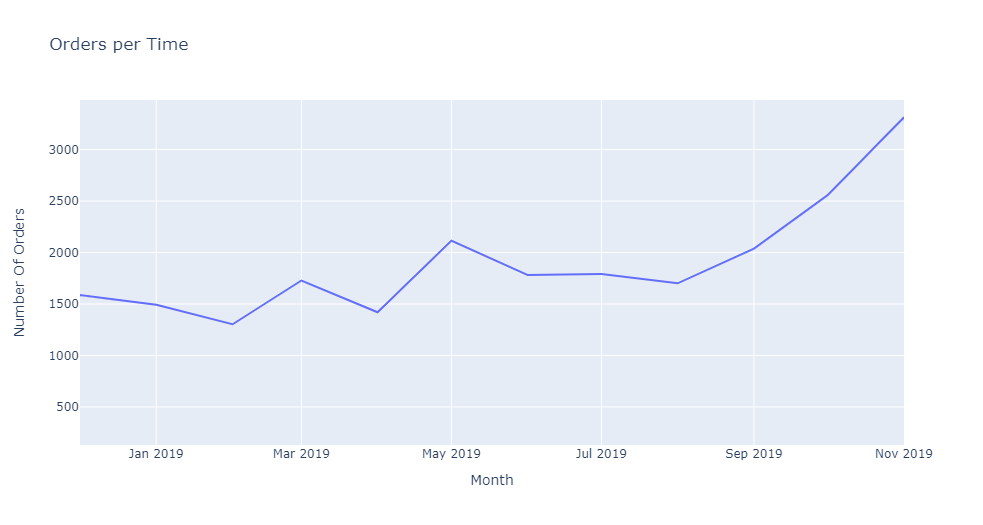

We have data here for the whole year. We can see that the climax of our orders is in September-November, with the climax being November with nearly 3000 orders that month. The worst period is the period just after that, December-Febuary, with Febuary recording just above 1000 orders. This makes sense. October and November are the months of big discounts. This might be the reason for people buying in these months.

Let's check the amount of orders for certain products. We would think that Christmas products will sell more around the time of christmas. Let's check that:

In [56]:
christmas_products = pd.DataFrame()
for i in sales.index:
    for w in sales['item_name'][i].split(' '):
        if w == 'CHRISTMAS':
            christmas_products = christmas_products.append(sales.loc[i])

In [57]:
christmas_products.head(10)

,order_id,item_code,item_name,quantity,datetime,price,customer_id,revenue,month
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80.0,2018-11-29 09:00:00,2.55,13748.0,204.0,2018-11
122,536381,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4.0,2018-11-29 09:41:00,2.95,15311.0,11.8,2018-11
172,536385,85049A,TRADITIONAL CHRISTMAS RIBBONS,12.0,2018-11-29 09:56:00,1.25,17420.0,15.0,2018-11
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6.0,2018-11-29 10:03:00,8.50,12431.0,51.0,2018-11
211,536390,22941,CHRISTMAS LIGHTS 10 REINDEER,2.0,2018-11-29 10:19:00,8.50,17511.0,17.0,2018-11
218,536390,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40.0,2018-11-29 10:19:00,2.55,17511.0,102.0,2018-11
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288.0,2018-11-29 10:19:00,0.10,17511.0,28.8,2018-11
382,536402,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40.0,2018-11-29 11:22:00,2.55,15513.0,102.0,2018-11
383,536402,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40.0,2018-11-29 11:22:00,2.55,15513.0,102.0,2018-11
475,536408,22812,PACK 3 BOXES CHRISTMAS PANNETONE,12.0,2018-11-29 11:41:00,1.95,14307.0,23.4,2018-11


Great! Let's check their distribution over time:

In [83]:
christmas_items_per_months = christmas_products.groupby(['month']).agg({'order_id':'nunique'}).reset_index()
christmas_items_per_months.columns = ['month','number_of_orders']
fig = px.line(christmas_items_per_months,
              x = 'month',
              y = 'number_of_orders',
              title = 'Orders per Time for Christmas products',
              labels ={'month':'Month','number_of_orders':'Number Of Orders'})
fig.update_xaxes(range = ['2018-12-01','2019-11-01'])
fig.show()

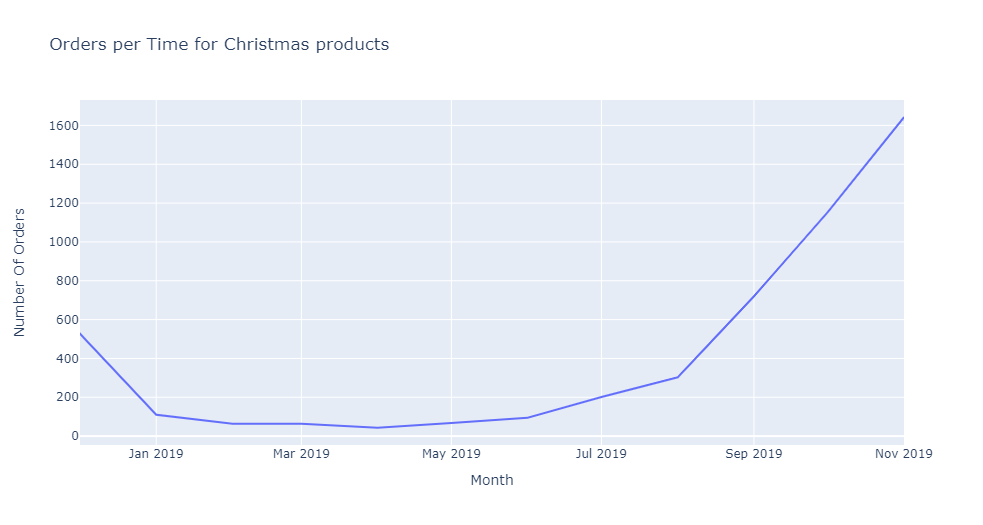

We can see here that our theory was right: People buy seasonal items closer to the season. We can see that from January until September, these items were not ordered much. But from September to December, their sales increase significantly. It is still unusual that November had a lot more orders than December. Maybe the shiping time is long, or the marketing team did something better in 2019.

Let's check if there are any items customers came back to buy. In order to do that, Let's filter our sales data to data that dosent have any null customer id's:

In [59]:
filtered_sales = sales.dropna()

Now, Let's group the data by customer id:

In [60]:
returning_customers = filtered_sales.groupby(['customer_id','item_name']).agg({'item_code':'count'}).reset_index()
returning_customers.columns = ['customer_id','item_name','number_of_times_ordered']
returning_customers.head()

,customer_id,item_name,number_of_times_ordered
0,12346.0,MEDIUM CERAMIC TOP STORAGE JAR,2
1,12347.0,3D DOG PICTURE PLAYING CARDS,5
2,12347.0,3D SHEET OF CAT STICKERS,1
3,12347.0,3D SHEET OF DOG STICKERS,1
4,12347.0,60 TEATIME FAIRY CAKE CASES,3


Now we need to filter all the items that have only 1:

In [61]:
returning_customers = returning_customers.loc[returning_customers['number_of_times_ordered'] > 1]

Now, we can check the items that apper most:

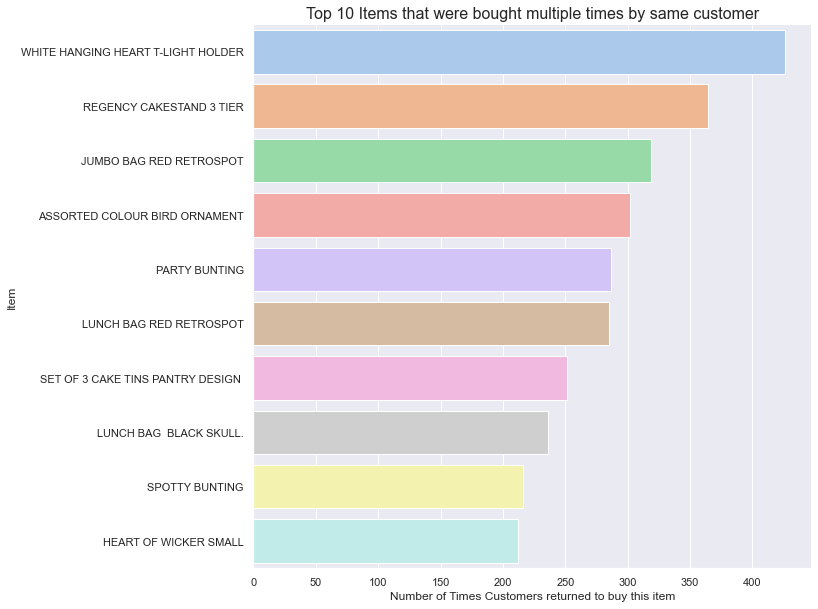

In [62]:
top10_returning_items = returning_customers['item_name'].value_counts().sort_values(ascending = False)[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = top10_returning_items.values,y = top10_returning_items.index)
plt.title('Top 10 Items that were bought multiple times by same customer')
plt.xlabel('Number of Times Customers returned to buy this item')
plt.ylabel('Item')
plt.show()

We can see that this chart is excatly like the chart with items with the most orders. This shows us someting important: These items were bought by the same customers multiple times. This is vital information for reccomendation systems.

Let's check if people tend to buy cheaper items:

In [63]:
items = items[['item_name','price_category']]
sales = sales.merge(items, on = 'item_name', how = 'left')

In [84]:
pie_chart = sales.groupby('price_category').agg({'order_id':'nunique'})
fig = go.Figure(data = [go.Pie( 
    labels = pie_chart.sort_values(by = 'order_id').index,
    values = pie_chart.sort_values(by = 'order_id')['order_id'])])
fig.update_layout(title = 'Number of Orders per Price Category')
fig.show()

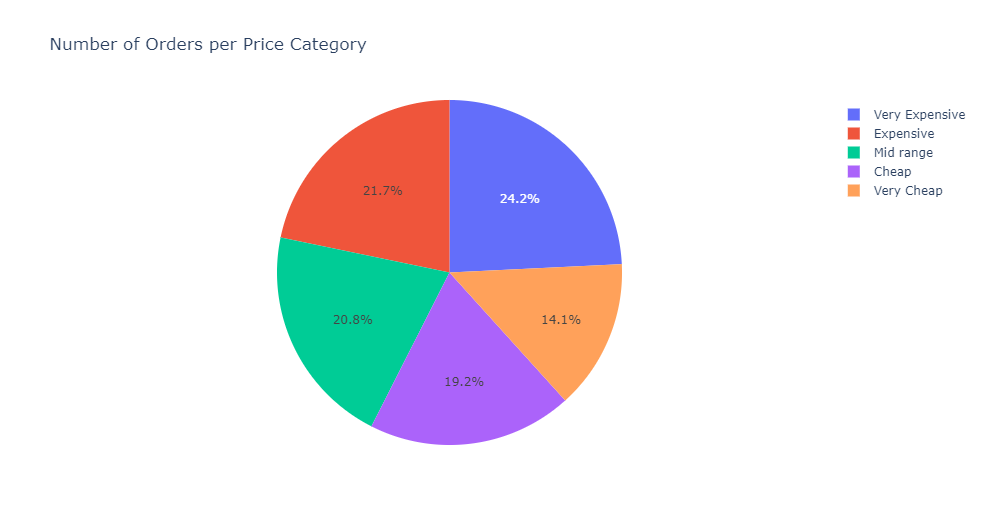

We can see the data is distributed quite evenly between the 5 groups, but when we compare the expensive to the cheap prices, We'll see there is more than 10% difference in the number of orders that contain expensive products.

In [85]:
pie_chart_1 = sales.groupby('price_category').agg({'quantity':'sum'}).reset_index()
fig = go.Figure(data = [go.Pie( 
    labels = pie_chart_1.sort_values(by = 'quantity')['price_category'],
    values = pie_chart_1.sort_values(by = 'quantity')['quantity'])])
fig.update_layout(title = 'Sales per Price Category')
fig.show()

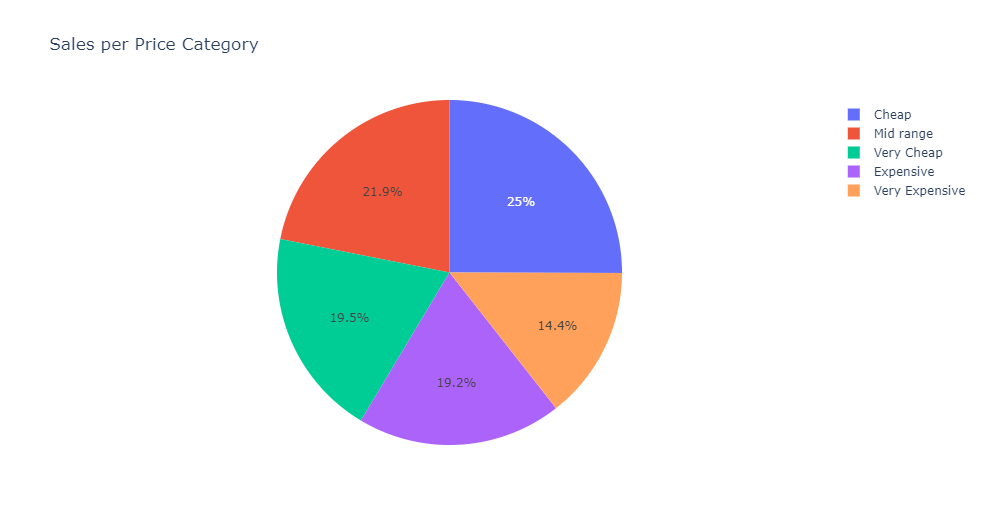

We see that as opposed to sales, Item's that are cheaper are bought in much bigger quantites. This makes sense, Because cheaper things are often smaller, therefore you need a lot from them.

Let's try to compare items: Are people likley to order cheaper things with more expensive ones?

In [66]:
def Comparing (list1,list2,name1,name2):
    group = name1 + '+' + name2
    counter = 0
    for i in list1:
        if i in list2:
            counter += 1
    counter = counter / ((pie_chart['order_id'][name1] + pie_chart['order_id'][name2])) * 100
    dic = {'group': group,'percentage_of_occurrences':counter}
    return pd.Series(dic)    

In [67]:
categories = sales.groupby('price_category').agg({'order_id': 'unique'}).reset_index()
comparing_dataframe = pd.DataFrame(columns = ['group','percentage_of_occurrences'])
for i in categories.index:
    for z in range(4,i,-1):
        row = Comparing(categories['order_id'][i],categories['order_id'][z],categories['price_category'][i],categories['price_category'][z])
        comparing_dataframe = comparing_dataframe.append(row, ignore_index = True) 
            

In [68]:
comparing_dataframe.head(10)

,group,percentage_of_occurrences
0,Cheap+Very Expensive,38.986138
1,Cheap+Very Cheap,37.138610
2,Cheap+Mid range,40.966426
3,Cheap+Expensive,40.184179
4,Expensive+Very Expensive,40.961492
5,Expensive+Very Cheap,35.346671
6,Expensive+Mid range,42.502760
7,Mid range+Very Expensive,40.163012
8,Mid range+Very Cheap,36.312730
9,Very Cheap+Very Expensive,32.980679


In [86]:
fig = px.bar(
    comparing_dataframe.sort_values(by = 'percentage_of_occurrences'), 
    x = 'group',
    y = 'percentage_of_occurrences',
    labels = {'group':'Group Combinations', 'percentage_of_occurrences':'Percentage of Occurrences'})
fig.update_layout(title = 'Price Categories Combinations - Percentages')
fig.update_yaxes(range = (30,45))

fig.show()

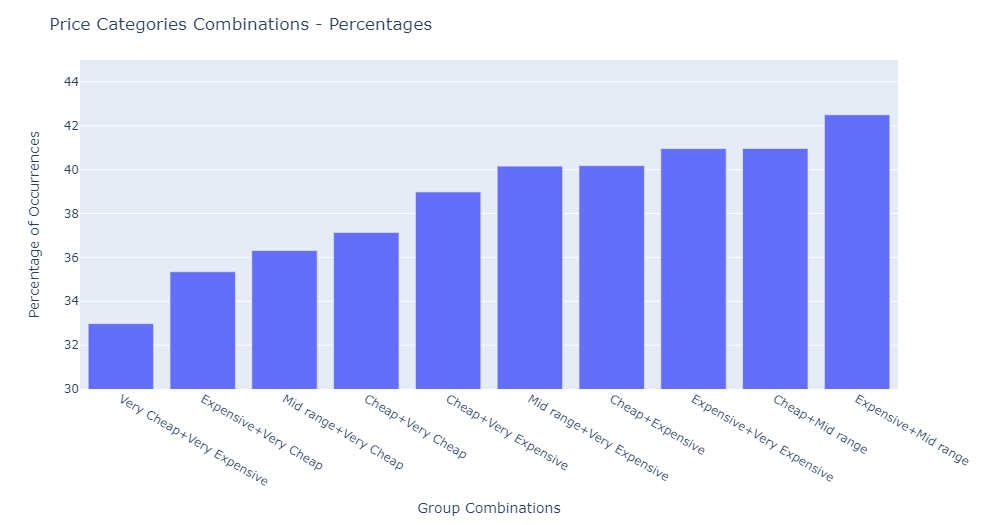

We can see that the most common combination is expensive products and mid range products. At the bottom 4, We have all the combinations for the 'Very Cheap' products. This shows that orders with relativly expensive items are the most likley to be big orders with various different products.

### Hypothesis:

Let's check the hypothesis that orders under 5 dollars are the same in terms of quantity than orders that cost more than 5$.

H0: quantites for orders under 5 dollars and over 5 dollars is the same.

H1: quantittes for orders under 5 dollars and over 5 dollars are different.

First, Let's create our samples:

In [70]:
under_5_orders = sales.groupby('order_id').agg({'revenue': 'sum','quantity':'sum'}).reset_index().query('revenue < 5')
over_5_orders = sales.groupby('order_id').agg({'revenue': 'sum','quantity':'sum'}).reset_index().query('revenue > 5')
sample1 = under_5_orders['quantity']
sample2 = over_5_orders['quantity']

Let's check the distribution of the samples:

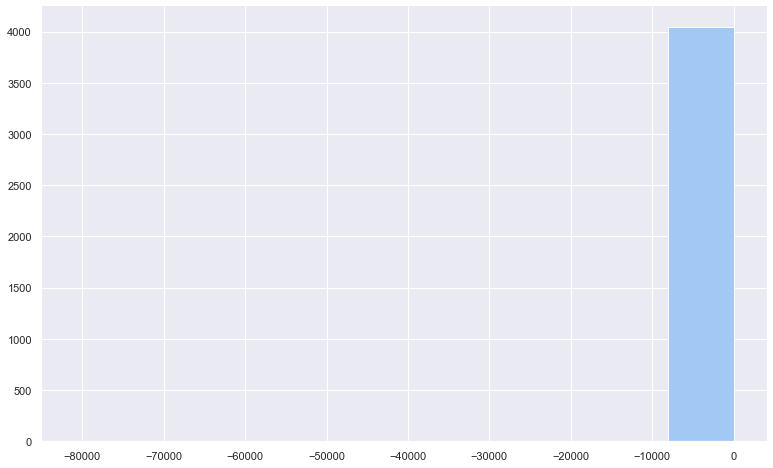

In [71]:
sample1.hist();

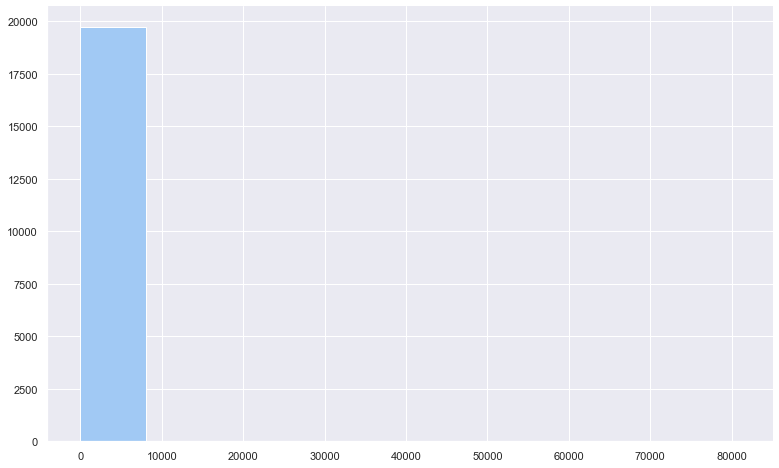

In [72]:
sample2.hist();

Let's get rid of our outliners:

In [73]:
sample1 = sample1[sample1 > 0]

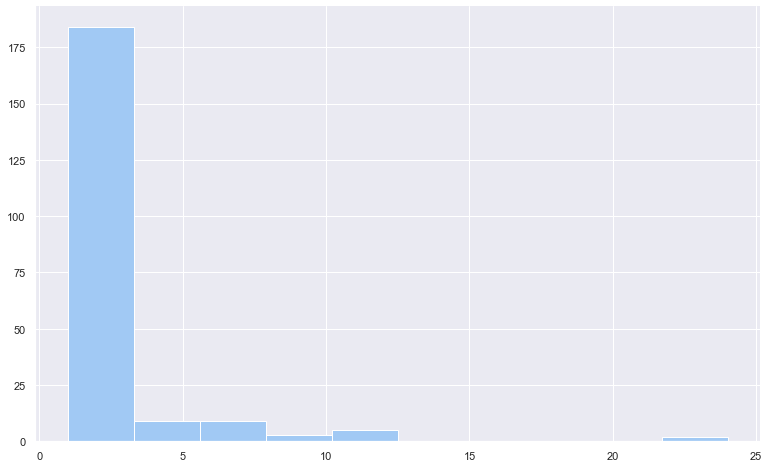

In [74]:
sample1.hist();

In [75]:
sample2 = sample2[sample2 < np.percentile(sample2,q = (99))]

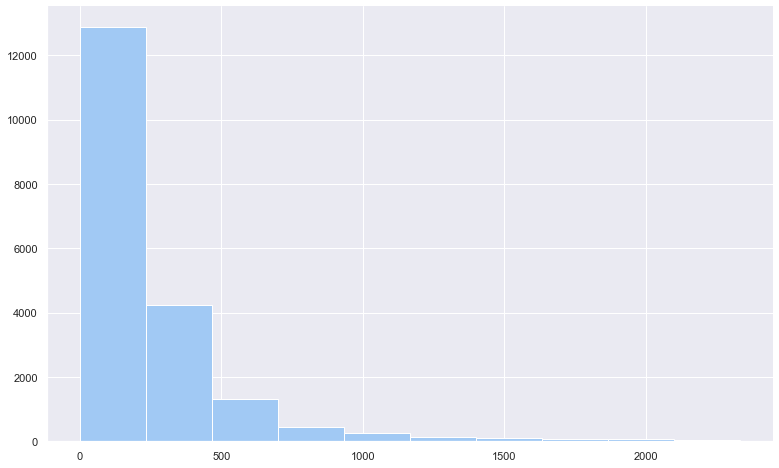

In [76]:
sample2.hist();

We can see the distribution of our samples is the same, so we'll take it into account when we do our t-test:

In [77]:
alpha = 0.01 # We will define our threshold at 1% change.
results = st.ttest_ind(sample1,sample2, equal_var = True) #equal var is false because we found that the distibutions are the same
print(results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

1.3217230705498616e-34
We reject the null hypothesis


We can see that there indeed is a difference for orders under 5 dollars and orders over 5 dollars.

# Conclusion:

Let's sum up our study:
1. We studied the data.
2. We dealt with missing values and duplicates, changed datatypes, changed collumn names and filtered the data.
3. We studied the distribution of the product prices and quantity, created new columns and categorized our data.
4. We discovered the top and bottom 10 products in terms of number of orders,sales and revenue.
5. We studied the sales of products per date and the sales of seasonal products.
6. We checked which products customers buy more than once.
7. We studied the share of orders and quantity per price category and the most common combinations.
8. We tested the hypothesis that orders that are less then 5 dollars have less products than orders that cost more than 5 dollars.

My research shows that:
1. Products prices are generally low.
2. Quantities are gennerally low. Some items have a negative average quantity, meaning that people return them back often.
3. The top ordered products are mainly decorative house products.
4. The top selling products are mainly crafts and one time things.
5. The top revenue products are mainly the products that sell the most, not ordered the most.
6. The shop's biggest peak of the year was September-November, and the worst time was December-January.
7. Christmas Items were barely sold off-season.
8. Products that customers buy more than once are the same products that have the largest number of orders.
9. People tend to order expensive items in more times, But order many cheap items in one order.
10. Orders with cheap items are less likley to be ordered with more expensive products.
11. Orders that cost less than 5 dollars have less quantity than orders with more than 5 dollars.

I can reccomend that:
1. We should have a quality check every 6 months to see which items are being returned more than they sell. Maybe we should take them off the shelf.
2. We should target people that want to buy decorative item and people that want to buy crafts.
3. We should increase our marketing during December-Febuary, In order for the sales to continue the momentum from November.
4. We should reccomend users seasonal products in different seasons.
5. If we identify a customer has bought a decorative item, We should reccomend it to him the next time he visits.
6. If we identify a customer that wants to buy a relativly expensive item, We should offer him othe expensive items.

## 5 links I used:

1. https://finance.arvato.com/en/blog/customer-journey/debt-purchasing-in-e-commerce-optimize-receivables-management-and-customer-experience/ - I didn't know what is a 'bad debt', so i looked it up.
2. https://plotly.com/python/axes/#setting-the-range-of-axes-manually - range of axes in plotly.Found how to play with the range.
3. https://www.google.com/search?q=white+hanging+heart+t-light+holder&sxsrf=AOaemvIJ8ctdVsk9jKTo5wmKU-g4ICat_A:1635507513059&source=lnms&tbm=isch&sa=X&sqi=2&ved=2ahUKEwiDx96ixO_zAhX9Q_EDHdjFCLEQ_AUoAXoECAEQAw&biw=1536&bih=664&dpr=1.25 - Didn't know what that was so I looked it up.
4. https://thispointer.com/python-how-to-check-if-an-item-exists-in-list-search-by-value-or-condition/ - In the christmas part, this helped me get on track!
5.'https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook' - Just for now, Didn't know how to insert a link.

## Presentation:

https://github.com/nadavkloot/Final-Presentation/blob/main/E-Commerce%20Store.pdf

## Dashboard:

https://public.tableau.com/app/profile/nadav.kloot/viz/FinalProjectDashboard_16356209590440/Dashboard1#1